# Cryptocurrency Analysis

This notebook provides interactive analysis of cryptocurrency data with inline visualizations.

## Features:
- Fetch data from exchanges using CCXT
- Technical indicator analysis
- Returns and volatility analysis
- Backtesting strategies


In [7]:
# Verify kernel and Python version
import sys
import os
from pathlib import Path

# Add project root to Python path so we can import local modules
# Find project root by looking for data/ directory
current_dir = Path.cwd()
project_root = current_dir

# If we're in analysis/ subdirectory, go up one level
if current_dir.name == 'analysis' and (current_dir.parent / 'data').exists():
    project_root = current_dir.parent
# If data/ is in current directory, we're already at project root
elif (current_dir / 'data').exists():
    project_root = current_dir
# Otherwise, try going up one level
elif (current_dir.parent / 'data').exists():
    project_root = current_dir.parent
else:
    # Last resort: use absolute path to project
    project_root = Path('/Users/justra/Python/crypto-analysis')

project_root = project_root.resolve()
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

print("=" * 60)
print("KERNEL VERIFICATION")
print("=" * 60)
print(f"Python Version: {sys.version}")
print(f"Python Executable: {sys.executable}")
print(f"Project Root: {project_root}")
print(f"Current Working Directory: {os.getcwd()}")
print()

# Check if we're using the correct Python (should be 3.12+)
if sys.version_info >= (3, 12):
    print("✓ Python 3.12+ detected - Correct version!")
else:
    print(f"⚠ Warning: Python {sys.version_info.major}.{sys.version_info.minor} detected")
    print("  Expected Python 3.12+. Please select 'Python 3.12 (crypto-analysis)' kernel")
print("=" * 60)
print()

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set inline plotting for Jupyter/IDE
%matplotlib inline

# Import project modules
from data.fetch_data import CryptoDataFetcher, fetch_ohlcv
from analysis.technical_indicators import add_indicators
from analysis.backtests import SimpleBacktester, plot_backtest_results
from strategies.signals import simple_ma_crossover, rsi_strategy, macd_strategy

# Set style
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['figure.dpi'] = 100

print("✓ All imports successful!")
print("✓ Ready for analysis")


KERNEL VERIFICATION
Python Version: 3.12.12 (main, Nov 19 2025, 22:30:44) [Clang 21.1.4 ]
Python Executable: /Users/justra/Python/crypto-analysis/.venv/bin/python3
Project Root: /Users/justra/Python/crypto-analysis
Current Working Directory: /Users/justra/Python/crypto-analysis/analysis

✓ Python 3.12+ detected - Correct version!

✓ All imports successful!
✓ Ready for analysis


## 1. Load Data

Fetch cryptocurrency data from exchanges. Data is automatically cached to avoid repeated API calls.


In [8]:
# Configure data fetching
SYMBOL = 'BTC/USDT'  # Change to any trading pair (e.g., 'ETH/USDT', 'SOL/USDT')
TIMEFRAME = '1d'      # Options: '1m', '5m', '15m', '1h', '4h', '1d', '1w'
DAYS = 365            # Number of days of historical data
EXCHANGE = 'binance'  # Exchange name

# Initialize fetcher with caching enabled
fetcher = CryptoDataFetcher(exchange_name=EXCHANGE, use_cache=True, cache_max_age_hours=None)

# Fetch data
from datetime import datetime, timedelta
since_date = datetime.now() - timedelta(days=DAYS)
since_timestamp = int(since_date.timestamp() * 1000)

df = fetcher.fetch_ohlcv(SYMBOL, TIMEFRAME, since=since_timestamp)

print(f"Loaded {len(df)} candles for {SYMBOL}")
print(f"\nDate range: {df.index[0]} to {df.index[-1]}")
print(f"\nFirst few rows:")
df.head()


Loaded 365 candles for BTC/USDT

Date range: 2024-11-24 00:00:00 to 2025-11-23 00:00:00

First few rows:


,open,high,low,close,volume
timestamp,,,,,
2024-11-24,97672.40,98564.00,95734.77,97900.04,31200.97838
2024-11-25,97900.05,98871.80,92600.19,93010.01,50847.45096
2024-11-26,93010.01,94973.37,90791.10,91965.16,57858.73138
2024-11-27,91965.16,97208.21,91792.14,95863.11,41153.42734
2024-11-28,95863.11,96564.00,94640.00,95643.98,28814.54357


In [9]:
# Data summary statistics
df.describe()


,open,high,low,close,volume
count,365.000000,365.000000,365.000000,365.000000,365.000000
mean,102562.314986,104185.877699,100718.022027,102531.118192,22908.308888
std,11052.158171,10938.790585,11270.674965,11082.023182,15082.987065
min,76322.420000,80867.990000,74508.000000,76322.420000,3282.173520
25%,95300.000000,96753.910000,93578.170000,95186.270000,12989.230540
50%,103763.710000,105495.620000,101454.000000,103763.710000,19193.441600
75%,111004.900000,112575.270000,109394.810000,111004.890000,28151.053740
max,124658.540000,126199.630000,123084.000000,124658.540000,109921.729662


## 2. Price Chart with Volume


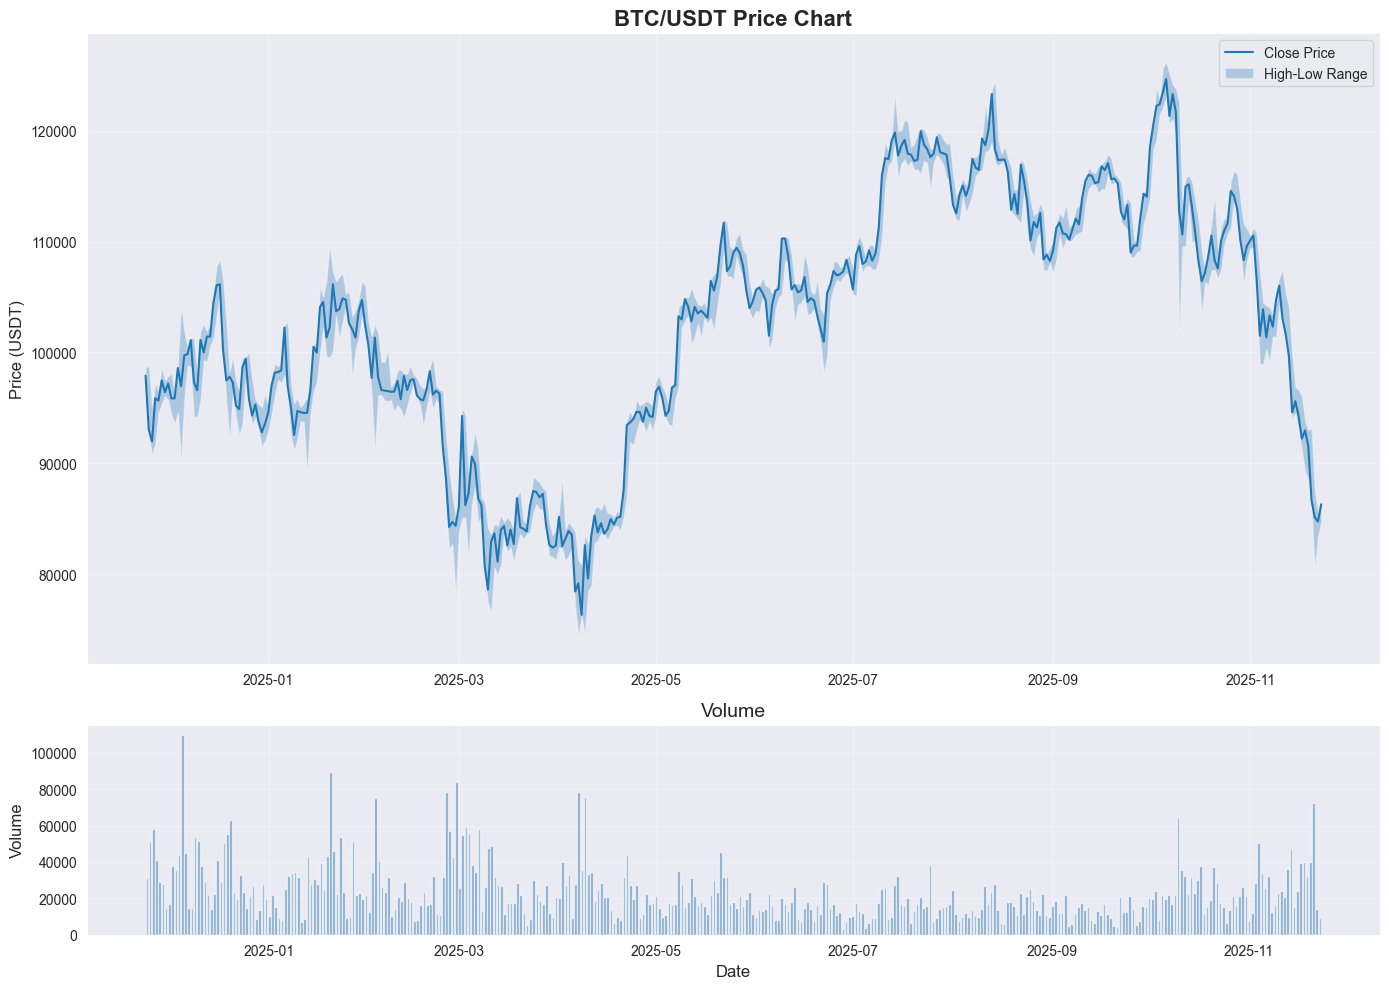

In [10]:
from analysis.exploratory import plot_price_chart

fig = plot_price_chart(df, SYMBOL)
plt.show()


## 3. Technical Indicators Analysis


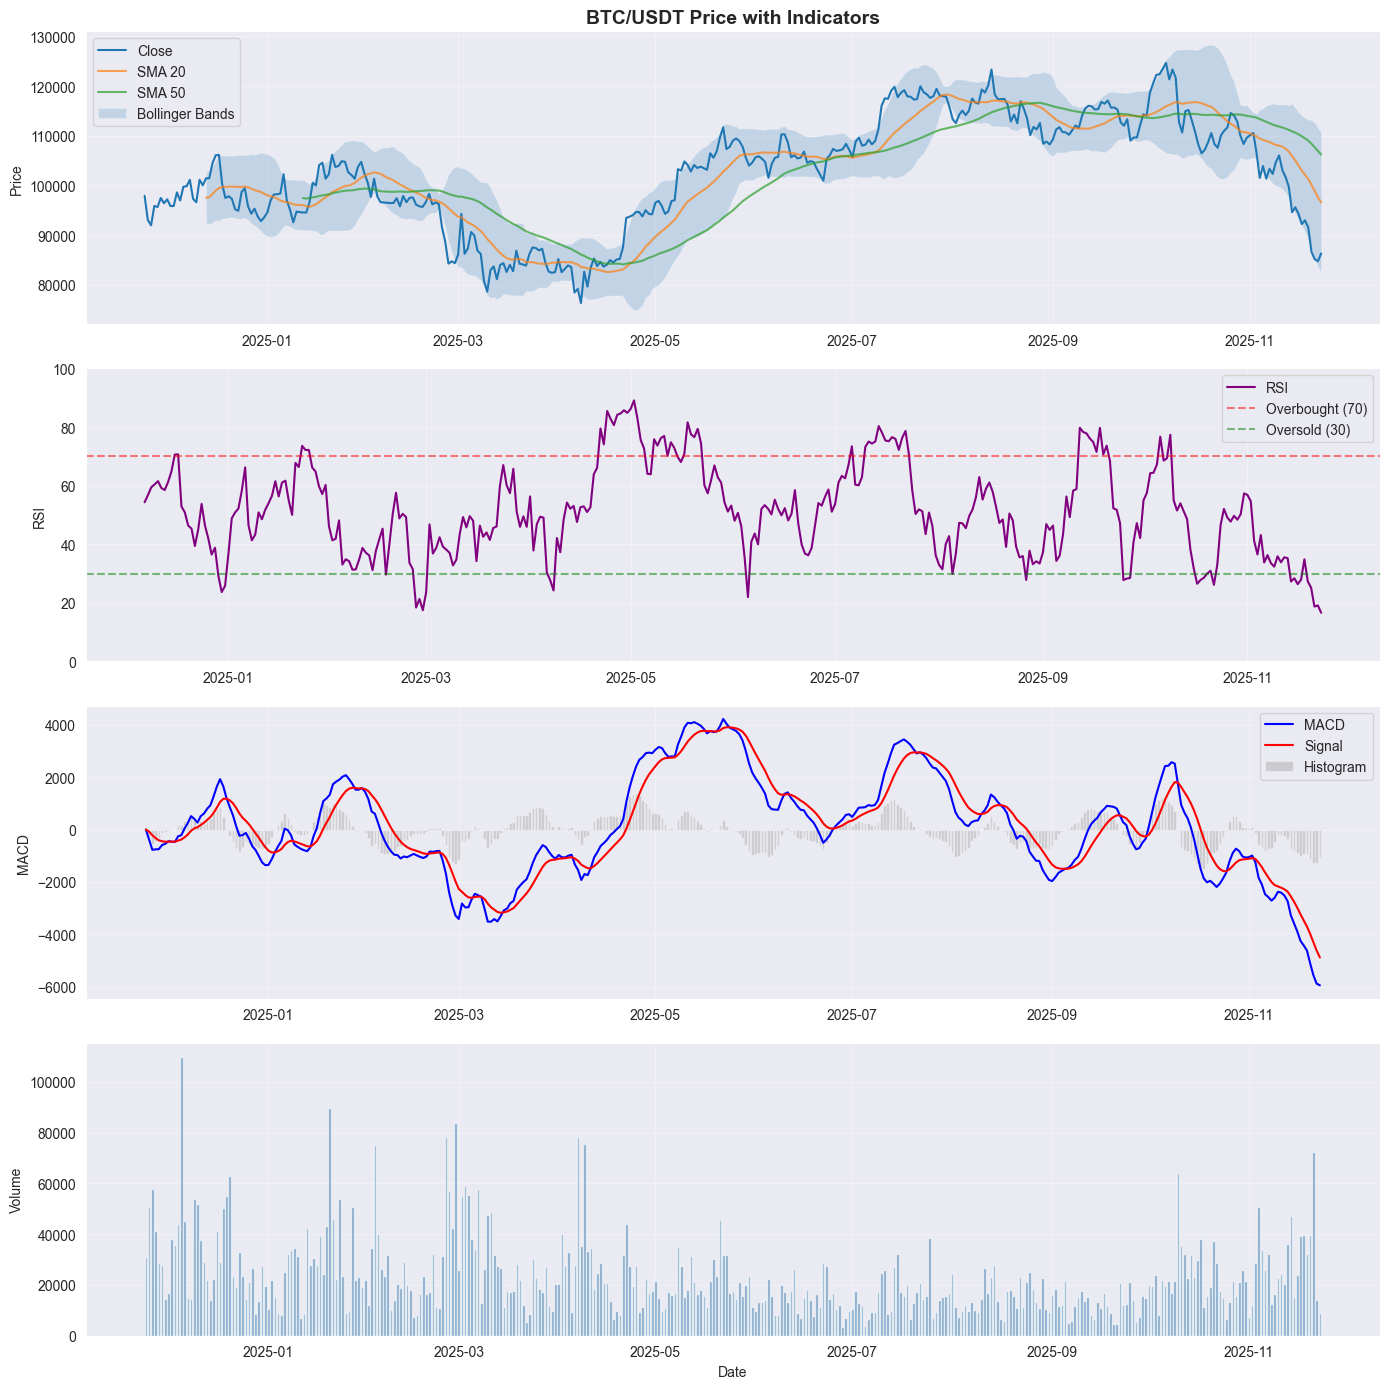

In [11]:
from analysis.exploratory import plot_indicators

fig = plot_indicators(df, SYMBOL)
plt.show()


## 4. Correlation Analysis


## 5. Returns Analysis


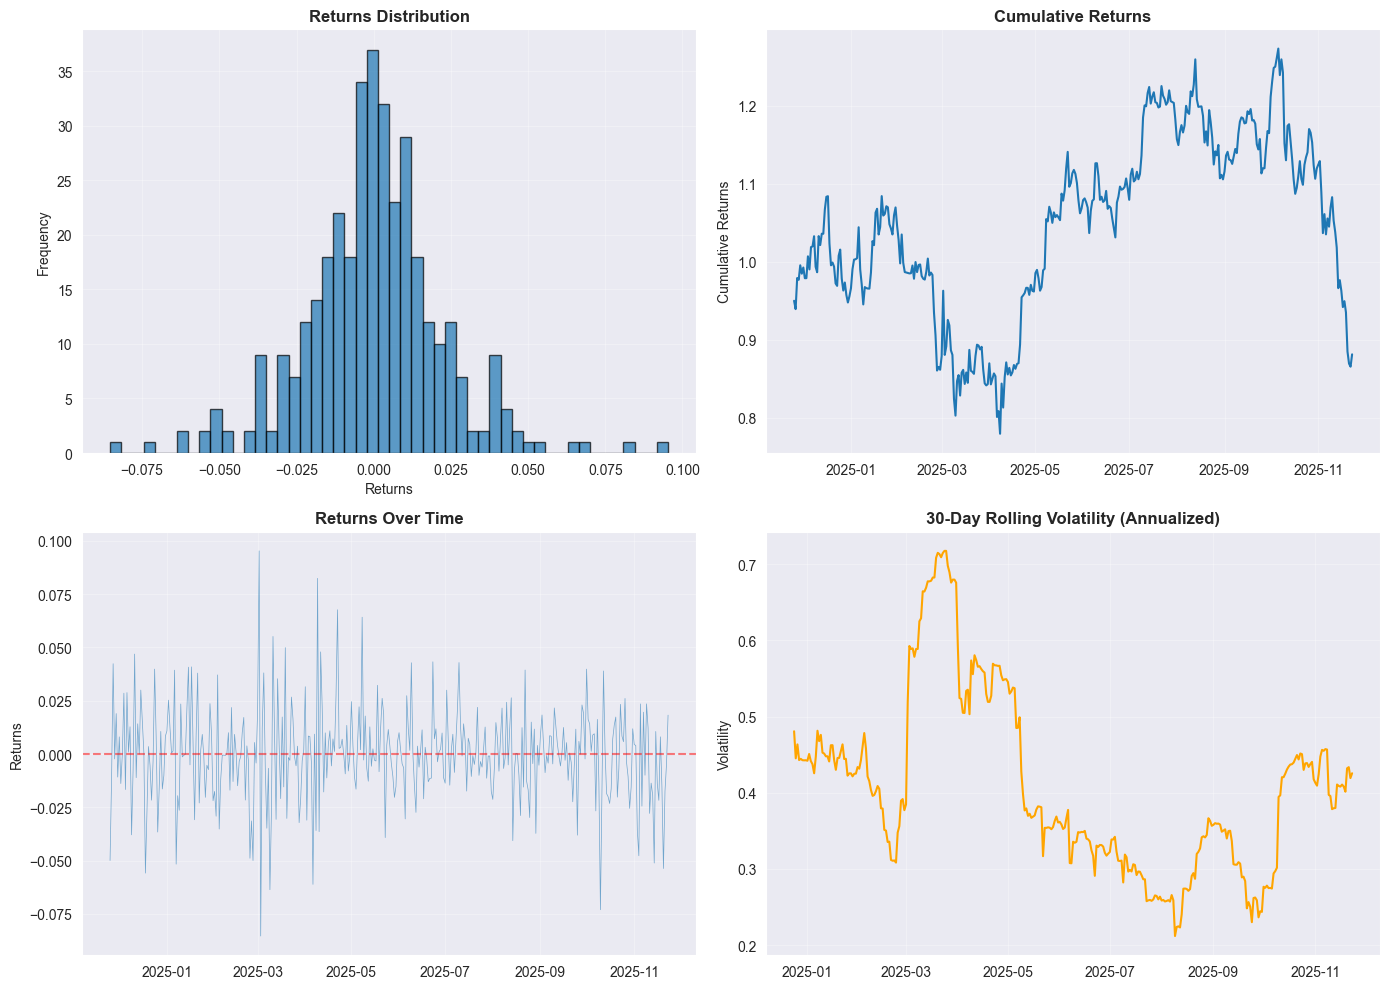

In [12]:
from analysis.exploratory import plot_returns_analysis

fig = plot_returns_analysis(df)
plt.show()


## 6. Backtesting Strategies

Test trading strategies on historical data.


In [13]:
# Select strategy: 'ma', 'rsi', or 'macd'
STRATEGY = 'ma'  # Change to test different strategies

if STRATEGY == 'ma':
    signal_func = simple_ma_crossover
elif STRATEGY == 'rsi':
    signal_func = rsi_strategy
elif STRATEGY == 'macd':
    signal_func = macd_strategy

# Run backtest
backtester = SimpleBacktester(initial_balance=10000.0, commission=0.001)
result = backtester.run_backtest(df, signal_func, position_size=1.0)

# Print results
backtester.print_results(result)


BACKTEST RESULTS
Initial Balance: $10,000.00
Final Balance: $10,314.83
Total Return: 3.15%
Sharpe Ratio: 0.21
Max Drawdown: 14.63%
Win Rate: 50.00%
Total Trades: 8


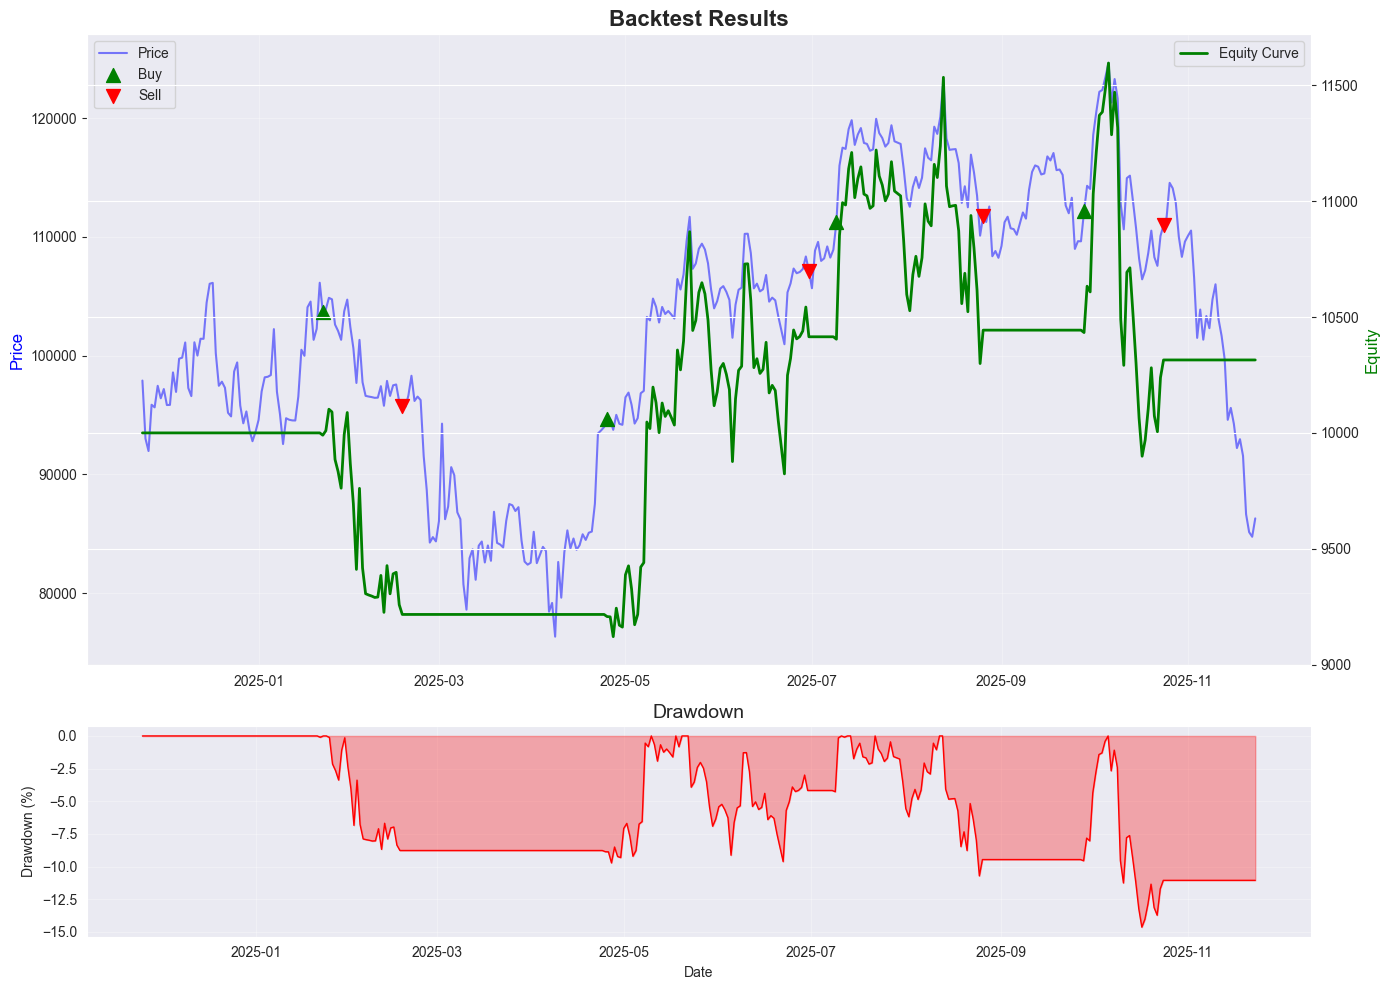

In [14]:
# Plot backtest results
fig = plot_backtest_results(df, result)
plt.show()


## 7. Custom Analysis

Add your own analysis cells below.
